In [34]:
import ipywidgets
import IPython.display
import iris

import numpy as np
import iris.quickplot as iplt
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
cube = iris.load_cube(iris.sample_data_path('A1B.2098.pp'))
print cube

air_temperature / (K)               (latitude: 145; longitude: 192)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Scalar coordinates:
          forecast_period: 2071434.0 hours, bound=(2067114.0, 2075754.0) hours
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
          time: 2099-06-01 00:00:00, bound=(2098-12-01 00:00:00, 2099-12-01 00:00:00)
     Attributes:
          STASH: m01s03i236
          source: Data from Met Office Unified Model
          um_version: 6.5
     Cell methods:
          mean: time (6 hour)


In [5]:
plot_type_dict = {'contour': iplt.contour, 'contourf': iplt.contourf, 'pcolor': iplt.pcolor, 'outline': iplt.outline,
                  'pcolormesh': iplt.pcolormesh, 'plot': iplt.plot, 'points': iplt.points}

plot_types = plot_type_dict.keys()
plot_types.sort()

type = ipywidgets.Dropdown(
    options=plot_types,
    value='contour',
    description='Plot-type:')

IPython.display.display(type)

In [45]:
cmap_list = ['viridis', 'inferno', 'plasma', 'magma', 'jet', 'summer', 'autumn']

cmap = ipywidgets.Dropdown(
    options=cmap_list,
    value='jet',
    description='cmap:')

extend = ipywidgets.Dropdown(
    options=['neither', 'both', 'min', 'max'],
    value='both',
    description='extend:')

levels = ipywidgets.Text(
    description='Levels:',
    value='np.linspace(np.min(cube.data), np.max(cube.data), 10)')

IPython.display.display(cmap, extend, levels)


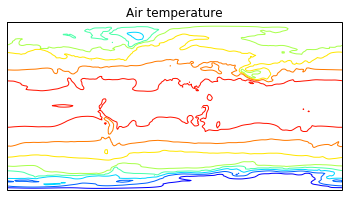

In [47]:
callable = (plot_type_dict[type.value])
callable(cube, cmap=cmap.value, extend=extend.value, levels=eval(levels.value))